#### 1. Linear Regression 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [2]:
df=load_breast_cancer()
pd.DataFrame(df.data).head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
# Load the Boston housing datasetboston 
X=pd.DataFrame(df.data)
y=df.target
X

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
regression=LinearRegression()
regression.fit(X_train, y_train)
mse=cross_val_score(regression , X_train, y_train, scoring='neg_mean_squared_error', cv=5)
mse

array([-0.04475119, -0.0856801 , -0.06038395, -0.06100871, -0.06189043])

In [7]:
np.mean(mse)

np.float64(-0.06274287601076647)

In [8]:
## prediction regression.predict(X_test)
reg_pred=regression.predict(X_test)
reg_pred

array([ 0.64605676,  0.21145476,  0.25442271,  1.12250875,  1.13799181,
       -0.71289896, -0.08600067,  0.38797159,  0.2571979 ,  0.9436093 ,
        0.78094607,  0.32290431,  0.90466324,  0.39424325,  0.90712802,
        0.14167817,  0.89241209,  1.23865572,  1.4585842 ,  0.05846474,
        0.68980688,  0.87025246, -0.45015063,  1.11390294,  0.98381026,
        0.72206103,  0.93703647,  0.90830701,  0.96425147, -0.19322926,
        1.02146792,  1.02823043,  0.82719109,  0.96825391,  1.09310585,
        0.83721198,  0.50498418,  0.63059167,  0.29121287,  0.78752676,
        1.18561267,  0.06153412,  0.95500015,  1.00565624,  0.48142084,
        0.67120152,  0.92335011,  1.11117489,  0.77347442,  1.02411546,
        0.24709081, -0.14189147,  0.54739876,  0.60075661,  0.98315142,
        0.8080443 ,  0.95638969, -0.35474261,  0.60287355,  1.05300072,
        0.93858079, -0.20870557, -0.37443091,  0.80621466,  0.91065343,
        0.58582146, -0.16646938, -0.14982645,  0.98083829,  0.79

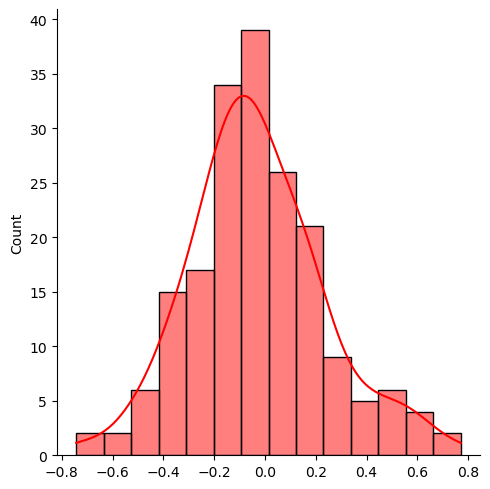

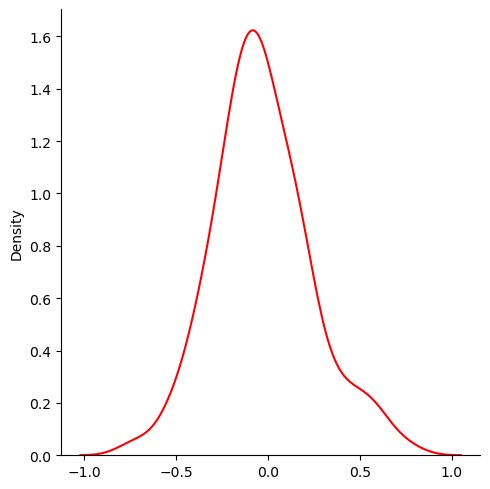

In [9]:
sns.displot(reg_pred-y_test, color='red', kde=True)
sns.displot(reg_pred-y_test, color='red', kind='kde')

In [10]:
from sklearn.metrics import r2_score
score=r2_score(y_test, reg_pred)
score

0.691135986947594